Total points for this HW: 100.

Please note: **Copying and pasting other people's work is absolutely prohibited**. Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

 <span style='color:red'>  pts</span>

### Question 1: Accuracy and interpretability (10 pts)  <span style='color:red'>  pts</span>

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3 pts)

Your answer here.

> When we predict the health outcomes with food acquisition patterns, like shopping frequency, store types, distance and duration, it's important to choose a more interpretable model. With the clear split orders and thresholds in decision tree model, we can learn what specific habits contribute to the better or worse health outcomes. Even through random forest model can give feature importance, it only the importance order without exact value and can't show the negative or positive influence. So, for this case, decision tree is a better choice.

b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3 pts)

Your answer here.

> When we predict the cancer diagnosis, accuracy is paramount and the interpretation of the features like smoothness, area, symmetry and fractal dimension is less important. Random forest model is generally very accurate, not prone to overfitting and can estimate feature importance. While the decision tree may be less accurate and probably overfit the training set since the number of medical features is relatively small. So, for this case, random forest is a better choice.

c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4 pts)

Your answer here.

> After training the random forest model, we can compute the feature importance, which directly measures variable importance by observing the effect on model accuracy of randomly shuffling each predictor variable. Maybe we can also combine with regression models for further analysis, to find the effect is positive or negative according to the regression coefficients. 

###  Question 2: Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been slightly modified, so you will get a different tree than the one shown in the lecture notes.  (30 points)  <span style='color:red'> 5 pts</span>

In [212]:
import pandas as pd
import numpy as np
import io
import warnings
warnings.simplefilter("ignore")

In [2]:
thefile = io.StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\nbad,4,93,light')
df = pd.read_csv(thefile)
df

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium
5,bad,4,94,light
6,bad,4,95,light
7,bad,8,139,weighty
8,bad,8,190,weighty
9,bad,8,145,weighty


### Please use numpy and pandas to do the computation for parts a) through f).  Do not use an existing decision tree implementation like sklearn for this question.

a) Start with the entire dataset and find the most common MPG value. (2 pts)

In [128]:
# your code here
pd.value_counts(df.MPG)

bad     15
good     5
Name: MPG, dtype: int64

In [4]:
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts)

In [130]:
# your code here

# create a dataframe to store the results
res = pd.DataFrame(columns = ['split', 'goodY', 'badY', 'goodN', 'badN', 'IG'])

for index, i in enumerate(df.cylinders.unique()):
    
    split = 'cylinders = %d ?' % i
    
    goodY = sum(df[df.cylinders==i].MPG == 'good')
    badY = sum(df[df.cylinders==i].MPG == 'bad')

    goodN = sum(df[df.cylinders!=i].MPG == 'good')
    badN = sum(df[df.cylinders!=i].MPG == 'bad')
    
    IG = InformationGain(goodY,badY,goodN,badN)
    
    res.loc[index] = [split, goodY, badY, goodN, badN, IG]
    
    
for index, i in enumerate(df.weight.unique()):
    
    index = index + len(df.cylinders.unique())
    split = 'weight = %s ?' % i
    
    goodY = sum(df[df.weight==i].MPG == 'good')
    badY = sum(df[df.weight==i].MPG == 'bad')

    goodN = sum(df[df.weight!=i].MPG == 'good')
    badN = sum(df[df.weight!=i].MPG == 'bad')
    
    IG = InformationGain(goodY,badY,goodN,badN)
    
    res.loc[index] = [split, goodY, badY, goodN, badN, IG]

res

,split,goodY,badY,goodN,badN,IG
0,cylinders = 4 ?,5,4,0,11,0.365294
1,cylinders = 6 ?,0,6,5,9,0.153078
2,cylinders = 8 ?,0,5,5,10,0.122556
3,weight = light ?,3,3,2,12,0.097107
4,weight = medium ?,2,6,3,9,0.000000
5,weight = weighty ?,0,6,5,9,0.153078


c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts) 

NOTE: if you'd like, you can just use all midpoints between consecutive values of the sorted HP attribute.  You are not required to exclude provably suboptimal questions like we did in the lecture.

In [131]:
# your code here

# compute the midpoints
midpoints = (df.HP.sort_values() + df.HP.sort_values().shift(1))/2
midpoints = midpoints.dropna().unique()

# number of existing rows in res
len_res = len(res) 

for index, i in enumerate(midpoints):
    
    index = index + len_res
    split = 'HP > %f ?' % i
    
    goodY = sum(df[df.HP>i].MPG == 'good')
    badY = sum(df[df.HP>i].MPG == 'bad')

    goodN = sum(df[df.HP<=i].MPG == 'good')
    badN = sum(df[df.HP<=i].MPG == 'bad')
    
    IG = InformationGain(goodY,badY,goodN,badN)
    
    res.loc[index] = [split, goodY, badY, goodN, badN, IG]

res

,split,goodY,badY,goodN,badN,IG
0,cylinders = 4 ?,5,4,0,11,0.365294
1,cylinders = 6 ?,0,6,5,9,0.153078
2,cylinders = 8 ?,0,5,5,10,0.122556
3,weight = light ?,3,3,2,12,0.097107
4,weight = medium ?,2,6,3,9,0.000000
5,weight = weighty ?,0,6,5,9,0.153078
6,HP > 70.000000 ?,4,15,1,0,0.105915
7,HP > 78.000000 ?,3,15,2,0,0.226258
8,HP > 83.000000 ?,2,15,3,0,0.367103
9,HP > 87.000000 ?,2,14,3,1,0.214171


d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? (4 pts)

Your answer here:

According to the IG values, the optimal binary split is: HP > 92.5 ?  --0.5091859254608121

Then, HP <= 92.5 needs further partitioning. It has 5 good and 2 bad, not pure.

e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree. (6 pts)

In [152]:
# your code here

df2 = df[df.HP<=92.5]
df2

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
11,good,4,92,medium
14,good,4,89,medium
15,good,4,65,light
16,bad,6,85,medium
17,good,4,81,light


In [153]:
pd.value_counts(df2.MPG)

good    5
bad     2
Name: MPG, dtype: int64

In [150]:
# create a dataframe to store the results
res2 = pd.DataFrame(columns = ['split', 'goodY', 'badY', 'goodN', 'badN', 'IG'])

for index, i in enumerate(df2.cylinders.unique()):
    
    split = 'cylinders = %d ?' % i
    
    goodY = sum(df2[df2.cylinders==i].MPG == 'good')
    badY = sum(df2[df2.cylinders==i].MPG == 'bad')

    goodN = sum(df2[df2.cylinders!=i].MPG == 'good')
    badN = sum(df2[df2.cylinders!=i].MPG == 'bad')
    
    IG = InformationGain(goodY,badY,goodN,badN)
    
    res2.loc[index] = [split, goodY, badY, goodN, badN, IG]
    
    
for index, i in enumerate(df2.weight.unique()):
    
    index = index + len(df2.cylinders.unique())
    split = 'weight = %s ?' % i
    
    goodY = sum(df2[df2.weight==i].MPG == 'good')
    badY = sum(df2[df2.weight==i].MPG == 'bad')

    goodN = sum(df2[df2.weight!=i].MPG == 'good')
    badN = sum(df2[df2.weight!=i].MPG == 'bad')
    
    IG = InformationGain(goodY,badY,goodN,badN)
    
    res2.loc[index] = [split, goodY, badY, goodN, badN, IG]

res2

,split,goodY,badY,goodN,badN,IG
0,cylinders = 4 ?,5,0,0,2,0.863121
1,cylinders = 6 ?,0,2,5,0,0.863121
2,weight = light ?,3,0,2,2,0.291692
3,weight = medium ?,2,2,3,0,0.291692


In [ ]:
# So, the next optimal split is cylinders = 4?, no more partitioning needed.

f) Draw or show the final decision tree in a format of your choice.  The decision to make at each step and the predicted value at each leaf node must be clear. (4 pts)

Your answer here.

```
                 (5 good, 15 bad)
                     HP > 92.5?
                        /\
                     N /  \ Y
                      /    \
                     /      \ 
         (5 good, 2 bad)   (0 good, 13 bad)   
          Cylinders = 4?        STOP           
               /\
            Y /  \ N
             /    \
            /      \
(5 good, 0 bad)    (0 good, 2 bad) 
     STOP               STOP
```

g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  Do this by hand using the tree structure learned in part f. (4 pts)

?,8,70,light  --> bad

?,6,113,medium  --> bad

?,4,83,weighty  --> good

?,4,95,weighty  --> bad


### Question 3, Predicting burden of disease （40 pts)

In [159]:
data=pd.read_csv("Burden of diarrheal illness by country.csv")
data.head(3)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


In [221]:
data.shape

(130, 16)

### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features with sklearn.tree.DecisionTreeClassifier. 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a train/test split and choose a hyper-parameter governing model simplicity, for example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier (using the training set) for different values of this parameter and for each such value, record the corresponding classification accuracy on the test set. (10 pts)

In [286]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# your code here

X = data.iloc[:, 1:15]
y = data.BurdenOfDisease

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2021)

AUC_OS = []
for i in range(1, 21):
    dt = DecisionTreeClassifier(max_depth = i, random_state = 1997)
    dt.fit(X_train,y_train)
#     AUC_OS.append(roc_auc_score(np.array(y_test), dt.predict_proba(X_test)[:,1]))
    acc = dt.score(X_test,y_test)
    print("Accuracy = {}, when max_depth = {}.".format(acc, i))
    AUC_OS.append(acc)

Accuracy = 0.38461538461538464, when max_depth = 1.
Accuracy = 0.4358974358974359, when max_depth = 2.
Accuracy = 0.5641025641025641, when max_depth = 3.
Accuracy = 0.46153846153846156, when max_depth = 4.
Accuracy = 0.46153846153846156, when max_depth = 5.
Accuracy = 0.48717948717948717, when max_depth = 6.
Accuracy = 0.5128205128205128, when max_depth = 7.
Accuracy = 0.48717948717948717, when max_depth = 8.
Accuracy = 0.48717948717948717, when max_depth = 9.
Accuracy = 0.48717948717948717, when max_depth = 10.
Accuracy = 0.48717948717948717, when max_depth = 11.
Accuracy = 0.48717948717948717, when max_depth = 12.
Accuracy = 0.48717948717948717, when max_depth = 13.
Accuracy = 0.48717948717948717, when max_depth = 14.
Accuracy = 0.48717948717948717, when max_depth = 15.
Accuracy = 0.48717948717948717, when max_depth = 16.
Accuracy = 0.48717948717948717, when max_depth = 17.
Accuracy = 0.48717948717948717, when max_depth = 18.
Accuracy = 0.48717948717948717, when max_depth = 19.
Accur

b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10 pts)

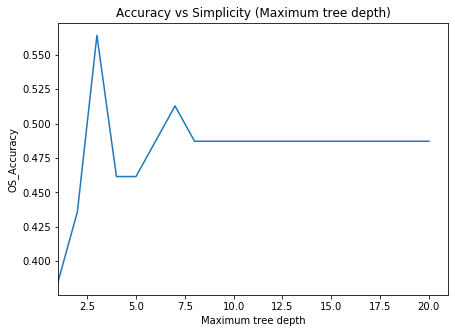

In [287]:
import matplotlib.pylab as plt

# your code here

plt.figure(figsize = (7,5))
plt.plot(range(1, 21), AUC_OS)
plt.xlabel("Maximum tree depth")
plt.ylabel("OS_Accuracy")
plt.title("Accuracy vs Simplicity (Maximum tree depth)")
plt.xlim(1, 21)
plt.show()

c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use the GridSearchCV package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the out of sample accuracy after tuning the hyper-parameter? (10 pts)

In [288]:
from sklearn.model_selection import GridSearchCV

# your code here

param_grid = {'max_depth': np.arange(2, 11, 1)}
dt = DecisionTreeClassifier(random_state = 1997)
gs = GridSearchCV(dt, param_grid, scoring = 'accuracy', cv = 3) 
gs_dt = gs.fit(X_train,y_train)

print(gs_dt.best_params_)
print(gs_dt.score(X_test, y_test))

{'max_depth': 2}
0.4358974358974359


d) Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data.  To do so, given your decision tree dt, you can use the code below, then copy and paste the resulting output into http://www.webgraphviz.com.  Alternatively, if you have graphviz installed on your machine, you can use that. (5 pts)

In [290]:
from sklearn import tree

# your code here
best_dt = gs_dt.best_estimator_
best_dt.fit(X_train, y_train)

thestring=tree.export_graphviz(best_dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=best_dt.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
print(thestring)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="GDPPCptaIntDol <= 2349.5, samples = 91, value = [23, 18, 27, 23], class = low", fillcolor="#f3f9fd"] ;
1 [label="SustAccImprWatUrb <= 0.842, samples = 32, value = [22, 10, 0, 0], class = awful", fillcolor="#f1ba93"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="samples = 19, value = [18, 1, 0, 0], class = awful", fillcolor="#e68844"] ;
1 -> 2 ;
3 [label="samples = 13, value = [4, 9, 0, 0], class = high", fillcolor="#99f191"] ;
1 -> 3 ;
4 [label="SustAccImprSanRur <= 0.624, samples = 59, value = [1, 8, 27, 23], class = low", fillcolor="#e9f4fc"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="samples = 32, value = [1, 8, 3, 20], class = medium", fillcolor="#eb9cf2"] ;
4 -> 5 ;
6 [label="samples = 27, value = [0, 0, 24, 3], class = low", fillcolor="#52a9e8"] ;
4 -> 6 ;
}


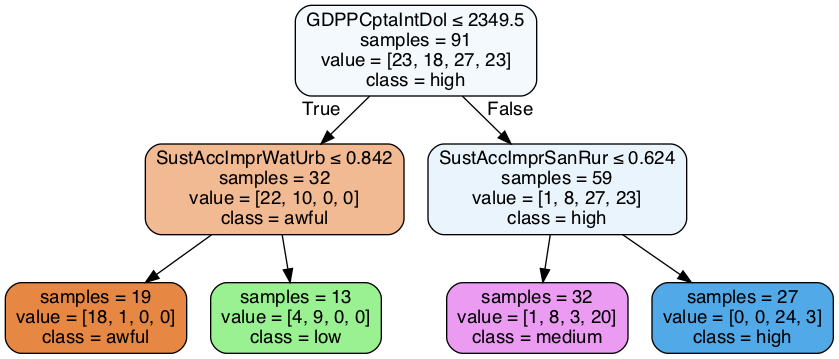

In [291]:
from sklearn import tree
from IPython.display import Image  
import pydotplus
thestring = tree.export_graphviz(best_dt, out_file=None,  
                         feature_names=X_train.columns.values, 
                         class_names=['awful', 'low', 'high', 'medium'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png()) 

### Question 4, Fit a random forest to the data from question 3 (20 pts)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 3c). (10 pts)

In [292]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# your code here

param_grid = {'max_depth': np.arange(2, 11, 1)}
rf = RandomForestClassifier(random_state = 1997)
gs = GridSearchCV(rf, param_grid, scoring = 'accuracy', cv = 3) # default cv=5
gs_rf = gs.fit(X_train, y_train)

print(gs_rf.best_params_)
print(gs_rf.score(X_test, y_test))

{'max_depth': 4}
0.6153846153846154


In [293]:
best_rf = gs_rf.best_estimator_
best_rf.predict(X_test)

array(['medium', 'awful', 'medium', 'awful', 'high', 'medium', 'medium',
       'awful', 'medium', 'medium', 'high', 'high', 'high', 'low', 'high',
       'medium', 'high', 'medium', 'low', 'low', 'high', 'awful',
       'medium', 'awful', 'awful', 'medium', 'high', 'low', 'high',
       'high', 'awful', 'high', 'high', 'awful', 'low', 'medium',
       'medium', 'awful', 'high'], dtype=object)

In [294]:
imp = pd.DataFrame(best_rf.feature_importances_, index=X.columns, columns=["Feature Importance"])
imp = imp.sort_values('Feature Importance', ascending = False)
imp.T

,GDPPCptaIntDol,SustAccImprSanRur,AdultLtrcyRate,SustAccImprSanUrb,FemaleLtrcyRate,ExtResHlthPctTotExpHlth,SustAccImprWatRur,SustAccImprWatUrb,RenewResm3PcptaYr,PCptaGovtExpHlthAvgExcRt,TotHlthExpPctofGDP,ODA4H2OPcptaDol,GenGovtPctofTotHlthExp,FrxnPeaceIn10
Feature Importance,0.160201,0.139606,0.110678,0.108123,0.088322,0.082882,0.077798,0.06889,0.036589,0.035642,0.034558,0.03161,0.018556,0.006545


b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10 pts)

Your answer here.

> As for the out-sample accuracy, the Random Forest Model (acc = 0.61) performs much better than the Decision Tree Model (acc = 0.43). And for the interpretability, Decision Tree can show the features with specific vlaues that contribute to different outcomes, while Random Forest can only give the feature importance rate. So, the comparison is consistent with the common sense, Random Forest is more accurate and Decision Tree is more interpretable.